In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

In [4]:
df_list = [customers_df, geolocation_df, items_df, payments_df, reviews_df, orders_df, products_df, sellers_df, category_translation_df]

for index, df in enumerate(df_list):
    variable_name = [name for name in globals() if globals()[name] is df][0]
    print(f"Data: {variable_name}")
    display(df.head())

    print(f"--------------------------------------------------------------------------------------------------")

    print("\n")



Data: customers_df


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


--------------------------------------------------------------------------------------------------


Data: geolocation_df


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


--------------------------------------------------------------------------------------------------


Data: items_df


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


--------------------------------------------------------------------------------------------------


Data: payments_df


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


--------------------------------------------------------------------------------------------------


Data: reviews_df


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


--------------------------------------------------------------------------------------------------


Data: orders_df


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


--------------------------------------------------------------------------------------------------


Data: products_df


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


--------------------------------------------------------------------------------------------------


Data: sellers_df


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


--------------------------------------------------------------------------------------------------


Data: category_translation_df


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


--------------------------------------------------------------------------------------------------




In [5]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


## Preprocessing

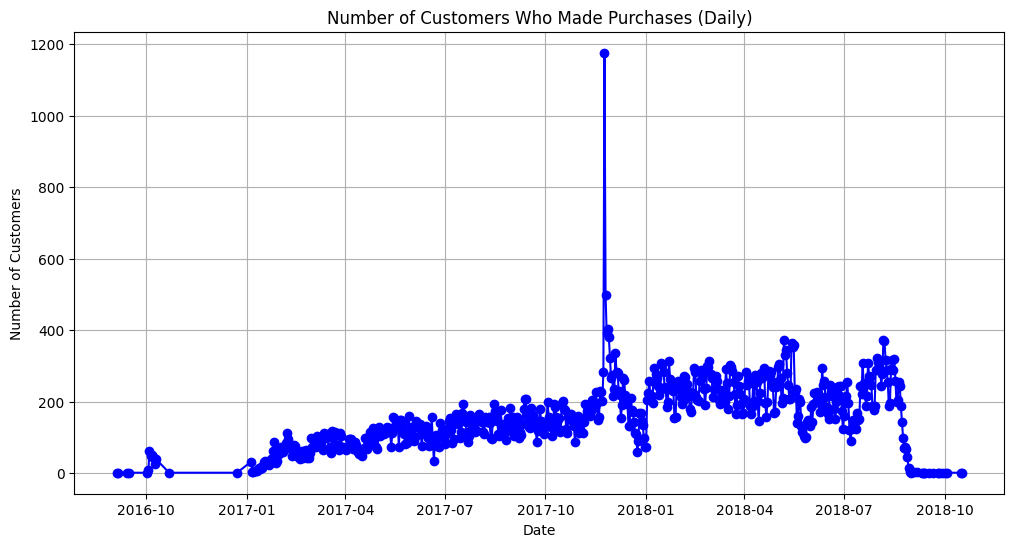

In [6]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
daily_customer_purchases = orders_df.groupby(orders_df['order_purchase_timestamp'].dt.date)['customer_id'].nunique()

plt.figure(figsize=(12, 6))
daily_customer_purchases.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Number of Customers Who Made Purchases (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

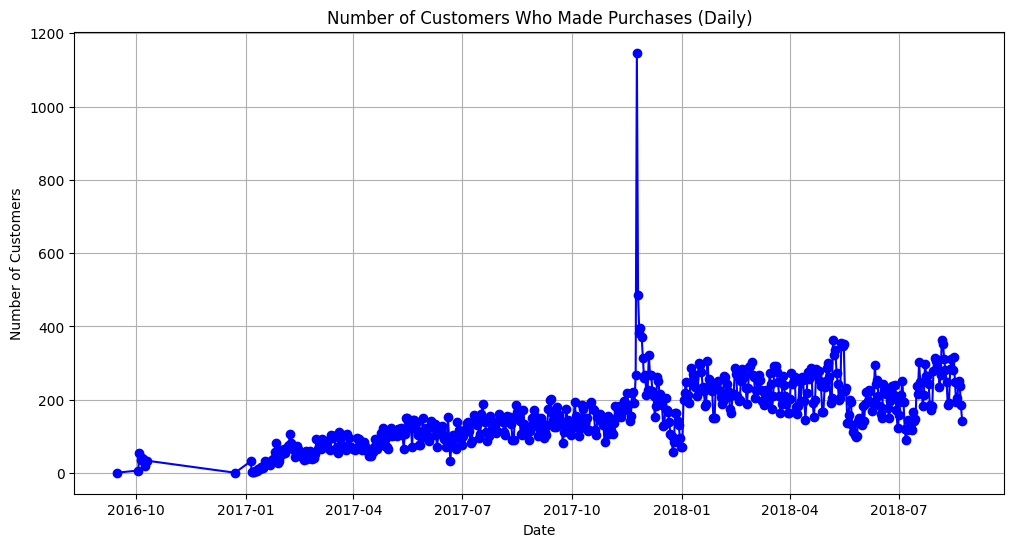

In [7]:
#trimming outliers

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
start_date = orders_df['order_purchase_timestamp'].min()
end_date = pd.to_datetime('2018-08-24')

orders_df = orders_df[(orders_df['order_purchase_timestamp'] >= start_date) & (orders_df['order_purchase_timestamp'] <= end_date)]


orders_df = orders_df[orders_df['order_status'] == 'delivered']
daily_customer_purchases = orders_df.groupby(orders_df['order_purchase_timestamp'].dt.date)['customer_id'].nunique()

plt.figure(figsize=(12, 6))
daily_customer_purchases.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Number of Customers Who Made Purchases (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

In [8]:
daily_customer_purchases_df = pd.DataFrame(daily_customer_purchases).reset_index()
daily_customer_purchases_df.columns = ['timestamp','no_of_purchases']
daily_customer_purchases_df

,timestamp,no_of_purchases
0,2016-09-15,1
1,2016-10-03,7
2,2016-10-04,54
3,2016-10-05,35
4,2016-10-06,41
...,...,...
601,2018-08-19,204
602,2018-08-20,251
603,2018-08-21,238
604,2018-08-22,185


In [9]:
#reemoviig outliers of last 15 days
daily_customer_purchases_df = daily_customer_purchases_df[:618]

## Modelling

### 1.Feature Engineering

In [10]:



daily_customer_purchases_df['timestamp'] = pd.to_datetime(daily_customer_purchases_df['timestamp'])
daily_customer_purchases_df['order_year'] = daily_customer_purchases_df['timestamp'].dt.year
daily_customer_purchases_df['order_month'] = daily_customer_purchases_df['timestamp'].dt.month
daily_customer_purchases_df['order_day'] = daily_customer_purchases_df['timestamp'].dt.day
daily_customer_purchases_df['order_day_of_week'] = daily_customer_purchases_df['timestamp'].dt.dayofweek
daily_customer_purchases_df['isWeekend'] = daily_customer_purchases_df['timestamp'].dt.dayofweek // 5

rolling_window_size = 5
no_of_records = len(daily_customer_purchases_df)

daily_customer_purchases_df['5_rolling_avg'] = daily_customer_purchases_df['no_of_purchases'].rolling(window=5).mean()
daily_customer_purchases_df['15_rolling_avg'] = daily_customer_purchases_df['no_of_purchases'].rolling(window=15).mean()

daily_customer_purchases_df.head()

,timestamp,no_of_purchases,order_year,order_month,order_day,order_day_of_week,isWeekend,5_rolling_avg,15_rolling_avg
0,2016-09-15,1,2016,9,15,3,0,NaN,NaN
1,2016-10-03,7,2016,10,3,0,0,NaN,NaN
2,2016-10-04,54,2016,10,4,1,0,NaN,NaN
3,2016-10-05,35,2016,10,5,2,0,NaN,NaN
4,2016-10-06,41,2016,10,6,3,0,27.6,NaN


### 2.Train Test Split

In [11]:
#train data : First 80 Percent of records order by time
#test data : Last 20 Percent of records order by time


train_pct = 0.8
features_list = ['order_year', 'order_month', 'order_day', 'order_day_of_week','isWeekend','5_rolling_avg','15_rolling_avg']
target_col = ['no_of_purchases']

train_data = daily_customer_purchases_df[features_list+target_col][:int(train_pct*no_of_records)]

test_data = daily_customer_purchases_df[features_list+target_col][int(train_pct*no_of_records):]
test_data[['5_rolling_avg','15_rolling_avg']] = None
train_data

,order_year,order_month,order_day,order_day_of_week,isWeekend,5_rolling_avg,15_rolling_avg,no_of_purchases
0,2016,9,15,3,0,NaN,NaN,1
1,2016,10,3,0,0,NaN,NaN,7
2,2016,10,4,1,0,NaN,NaN,54
3,2016,10,5,2,0,NaN,NaN,35
4,2016,10,6,3,0,27.6,NaN,41
...,...,...,...,...,...,...,...,...
479,2018,4,19,3,0,262.2,226.666667,287
480,2018,4,20,4,0,256.8,222.066667,192
481,2018,4,21,5,1,232.4,220.266667,154
482,2018,4,22,6,1,220.6,222.800000,199


In [12]:
test_data

,order_year,order_month,order_day,order_day_of_week,isWeekend,5_rolling_avg,15_rolling_avg,no_of_purchases
484,2018,4,24,1,0,None,None,265
485,2018,4,25,2,0,None,None,279
486,2018,4,26,3,0,None,None,250
487,2018,4,27,4,0,None,None,237
488,2018,4,28,5,1,None,None,166
...,...,...,...,...,...,...,...,...
601,2018,8,19,6,1,None,None,204
602,2018,8,20,0,0,None,None,251
603,2018,8,21,1,0,None,None,238
604,2018,8,22,2,0,None,None,185


### 3.Training

In [13]:
#used xgbboost given thhe features
#['order_year', 'order_month', 'order_day', 'order_day_of_week','isWeekend','5_rolling_avg','15_rolling_avg']


data = daily_customer_purchases_df.copy()
X_train, X_test, y_train, y_test = train_data[features_list], test_data[features_list], train_data[target_col], test_data[target_col]
model = xgb.XGBRegressor(n_estimators = 1000)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### 4.Testing

In [14]:
#sequetially getting prediction result and using for next timestamp prediction

last_30_purchases = train_data['no_of_purchases'][-30:].to_list()
x_test_index = X_test.index
y_pred = []

for i in x_test_index:
    test_point = X_test.loc[i].to_dict()
    curr_5_rolling_val,curr_15_rolling_val = sum(last_30_purchases[-5:])/5,sum(last_30_purchases[-15:])/15
    test_point['5_rolling_avg'] = curr_5_rolling_val
    test_point['15_rolling_avg'] = curr_15_rolling_val

    X_test.at[i,'5_rolling_avg'] = curr_5_rolling_val
    X_test.at[i,'15_rolling_avg'] = curr_15_rolling_val

    test_df = pd.DataFrame({ k:[v] for k,v in test_point.items()})
    
    predicted_val = model.predict(test_df)[0]
    last_30_purchases.append(predicted_val)
    y_pred.append(predicted_val)
    

In [15]:
X_test

,order_year,order_month,order_day,order_day_of_week,isWeekend,5_rolling_avg,15_rolling_avg
484,2018,4,24,1,0,223.0,229.466667
485,2018,4,25,2,0,219.9341,230.911367
486,2018,4,26,3,0,233.83999,235.279997
487,2018,4,27,4,0,246.141049,232.18035
488,2018,4,28,5,1,244.151605,227.917202
...,...,...,...,...,...,...,...
601,2018,8,19,6,1,241.592111,227.246978
602,2018,8,20,0,0,228.75582,228.725413
603,2018,8,21,1,0,238.914011,235.087873
604,2018,8,22,2,0,240.632169,236.590734


In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 41.1915201906298
Mean Squared Error (MSE): 2771.2866039876008
Root Mean Squared Error (RMSE): 52.643010970000574


In [17]:
daily_customer_purchases_df

,timestamp,no_of_purchases,order_year,order_month,order_day,order_day_of_week,isWeekend,5_rolling_avg,15_rolling_avg
0,2016-09-15,1,2016,9,15,3,0,NaN,NaN
1,2016-10-03,7,2016,10,3,0,0,NaN,NaN
2,2016-10-04,54,2016,10,4,1,0,NaN,NaN
3,2016-10-05,35,2016,10,5,2,0,NaN,NaN
4,2016-10-06,41,2016,10,6,3,0,27.6,NaN
...,...,...,...,...,...,...,...,...,...
601,2018-08-19,204,2018,8,19,6,1,248.8,269.266667
602,2018-08-20,251,2018,8,20,0,0,242.6,268.066667
603,2018-08-21,238,2018,8,21,1,0,227.0,259.733333
604,2018-08-22,185,2018,8,22,2,0,214.2,248.533333


In [18]:
test_results = pd.DataFrame()
test_results.index = daily_customer_purchases_df[int(train_pct*no_of_records):]['timestamp'].values
test_results['actual_purchases'] = daily_customer_purchases_df[int(train_pct*no_of_records):]['no_of_purchases'].values
test_results['predicted_purchases'] = y_pred
test_results

,actual_purchases,predicted_purchases
2018-04-24,265,271.670502
2018-04-25,279,261.529449
2018-04-26,250,215.505295
2018-04-27,237,189.052780
2018-04-28,166,155.807556
...,...,...
2018-08-19,204,204.064056
2018-08-20,251,296.874207
2018-08-21,238,272.436615
2018-08-22,185,247.997833


### 5.Comparision of Actual vs Test

<Axes: >

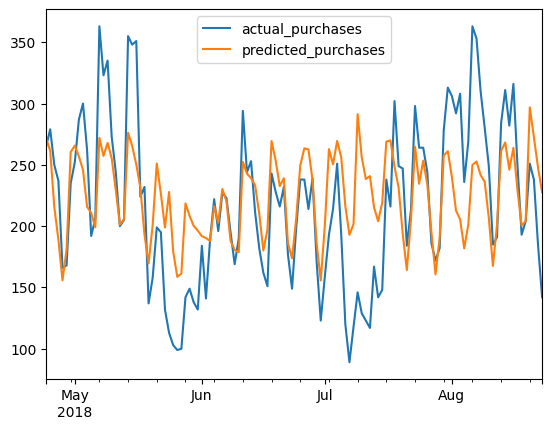

In [19]:
test_results.plot()

### Forcasting

In [20]:
# forecastig for ext 2 months

start_date = '2018-08-29'
end_date = '2018-11-10'
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

date_range = pd.date_range(start=start_date, end=end_date)
forecast_df = pd.DataFrame()
forecast_df['timestamp'] = date_range
forecast_df.head()

forecast_df['timestamp'] = pd.to_datetime(forecast_df['timestamp'])
forecast_df['order_year'] = forecast_df['timestamp'].dt.year
forecast_df['order_month'] = forecast_df['timestamp'].dt.month
forecast_df['order_day'] = forecast_df['timestamp'].dt.day
forecast_df['order_day_of_week'] = forecast_df['timestamp'].dt.dayofweek
forecast_df[['5_rolling_avg','15_rolling_avg']] = None
forecast_df['isWeekend'] = forecast_df['timestamp'].dt.dayofweek // 5

forecast_df.head()

,timestamp,order_year,order_month,order_day,order_day_of_week,5_rolling_avg,15_rolling_avg,isWeekend
0,2018-08-29,2018,8,29,2,None,None,0
1,2018-08-30,2018,8,30,3,None,None,0
2,2018-08-31,2018,8,31,4,None,None,0
3,2018-09-01,2018,9,1,5,None,None,1
4,2018-09-02,2018,9,2,6,None,None,1


In [21]:
forecast_df1 = forecast_df[features_list]
forecast_df_index = forecast_df.index
forecast_y_pred = []

for i in forecast_df_index:
    forecast_point = forecast_df1.loc[i].to_dict()
    curr_5_rolling_val,curr_15_rolling_val = sum(last_30_purchases[-5:])/5,sum(last_30_purchases[-15:])/15
    forecast_point['5_rolling_avg'] = curr_5_rolling_val
    forecast_point['15_rolling_avg'] = curr_15_rolling_val
#     forecast_point['30_rolling_avg'] = curr_30_rolling_val

    forecast_df1.at[i,'5_rolling_avg'] = curr_5_rolling_val
    forecast_df1.at[i,'15_rolling_avg'] = curr_15_rolling_val
#     forecast_df.at[i,'30_rolling_avg'] = curr_30_rolling_val

    forecast_point_df = pd.DataFrame({ k:[v] for k,v in forecast_point.items()})
    
    predicted_val = model.predict(forecast_point_df)[0]
    last_30_purchases.append(predicted_val)
    forecast_y_pred.append(predicted_val)
    
    
forecast_df['no_of_purchases'] = forecast_y_pred
forecast_df['5_rolling_avg'] = forecast_df1['5_rolling_avg'] 
forecast_df['15_rolling_avg'] = forecast_df1['15_rolling_avg'] 
forecast_df.head()

,timestamp,order_year,order_month,order_day,order_day_of_week,5_rolling_avg,15_rolling_avg,isWeekend,no_of_purchases
0,2018-08-29,2018,8,29,2,249.806958,235.342292,0,269.090302
1,2018-08-30,2018,8,30,3,262.812207,237.539253,0,252.574982
2,2018-08-31,2018,8,31,4,253.952362,240.589259,0,205.905365
3,2018-09-01,2018,9,1,5,240.646112,243.146223,1,185.066513
4,2018-09-02,2018,9,2,6,228.059848,242.065993,1,211.478088


In [22]:
forecast_df.tail()

,timestamp,order_year,order_month,order_day,order_day_of_week,5_rolling_avg,15_rolling_avg,isWeekend,no_of_purchases
69,2018-11-06,2018,11,6,1,228.221005,229.365192,0,282.140289
70,2018-11-07,2018,11,7,2,236.886795,229.972593,0,272.154358
71,2018-11-08,2018,11,8,3,248.004694,231.693047,0,260.204102
72,2018-11-09,2018,11,9,4,261.49061,233.842783,0,220.651398
73,2018-11-10,2018,11,10,5,262.785791,233.407384,1,203.001770


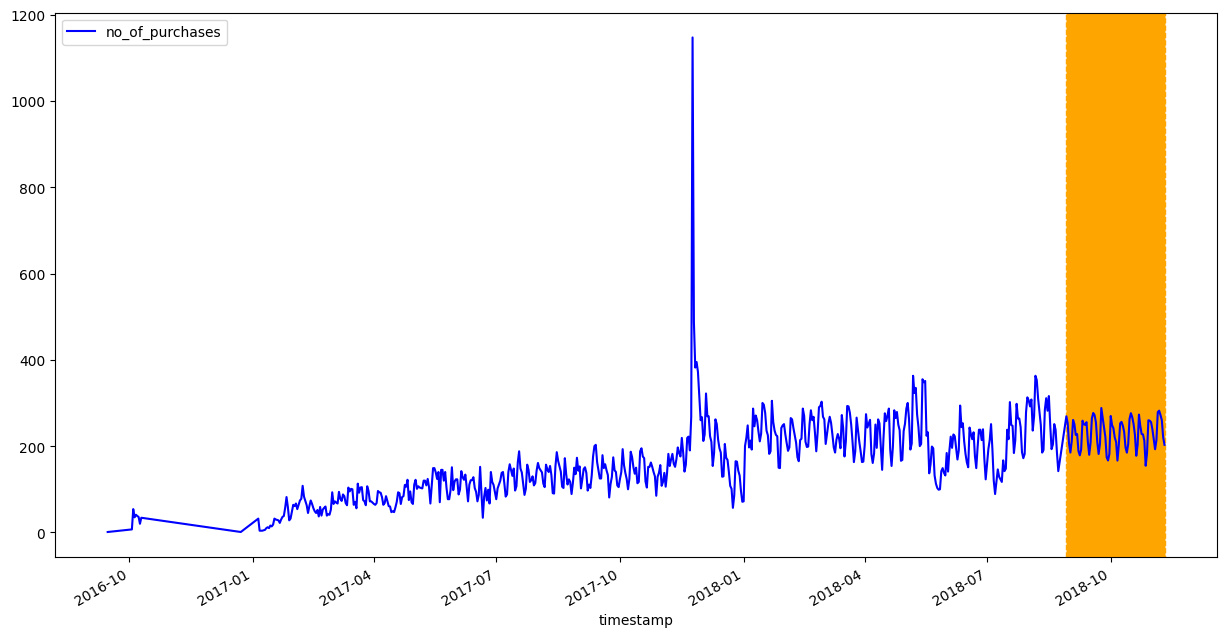

In [23]:
purchases_df = pd.concat([daily_customer_purchases_df,forecast_df])[['timestamp','no_of_purchases']].set_index('timestamp')

fig, ax = plt.subplots(figsize=(15, 8))  # Adjust the width and height as needed

ax = purchases_df.plot(color='blue',ax = ax)
ax.axvspan('2018-08-29','2018-11-10', color='orange', linestyle= '--')
plt.show()